### Importing Libraries

In [1]:
#!pip install pycaret
#!pip install seaborn

In [23]:
from pycaret.clustering import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Dataset

In [3]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

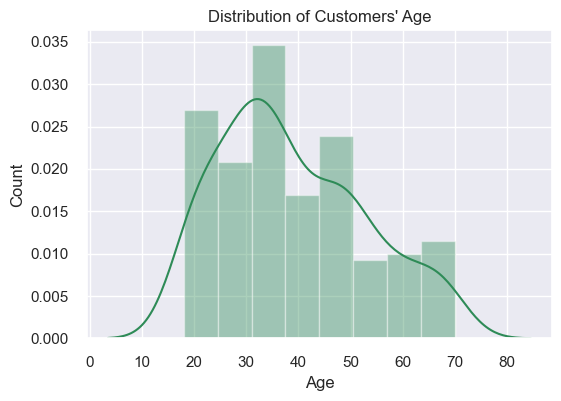

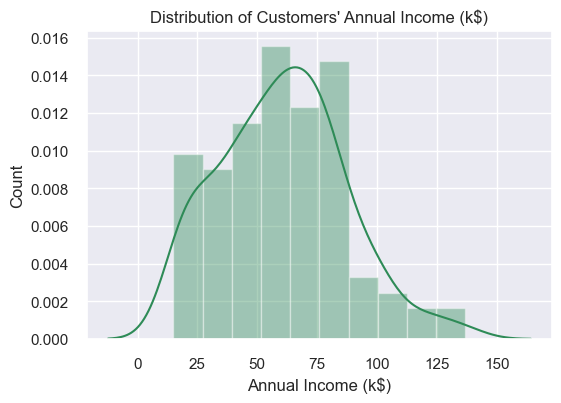

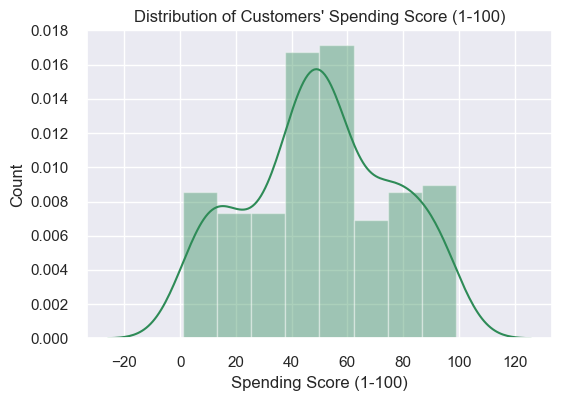

In [6]:
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.set(style='darkgrid')
    plt.figure(figsize=(6, 4))
    sns.distplot(df[column], color='#2E8B57')
    plt.title("Distribution of Customers' {}".format(column))
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

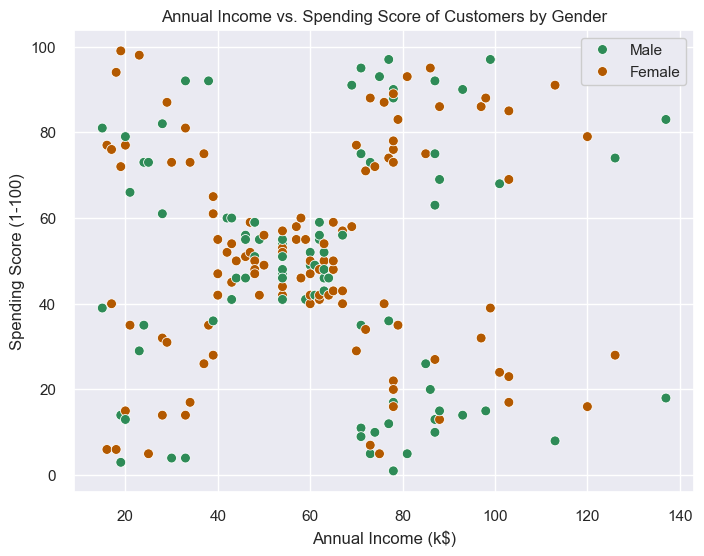

In [7]:
sns.set(style='darkgrid')
plt.figure(figsize=(8, 6))
palette = {'Male': '#2E8B57', 'Female': '#b35900'}
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'], palette=palette, marker='o', s=50, alpha=1) 
plt.title("Annual Income vs. Spending Score of Customers by Gender")
plt.legend(framealpha=1, frameon=True, loc='upper right')
plt.show()

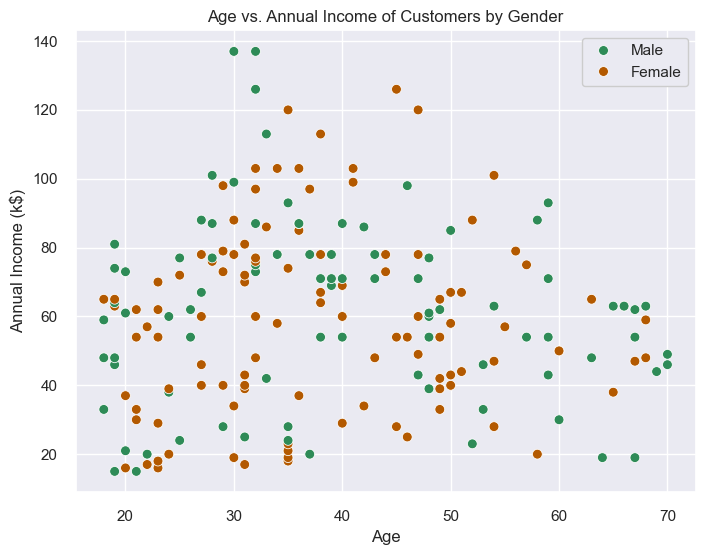

In [8]:
sns.set(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Gender'], palette=palette, marker='o', s=50, alpha=1) 
plt.title("Age vs. Annual Income of Customers by Gender")
plt.legend(framealpha=1, frameon=True, loc='upper right')
plt.show()

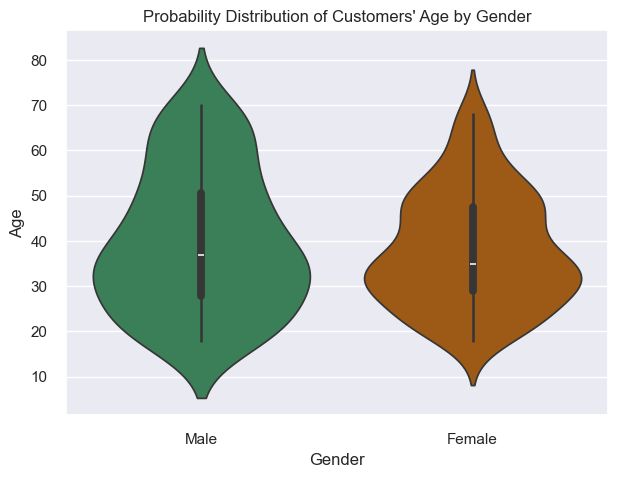

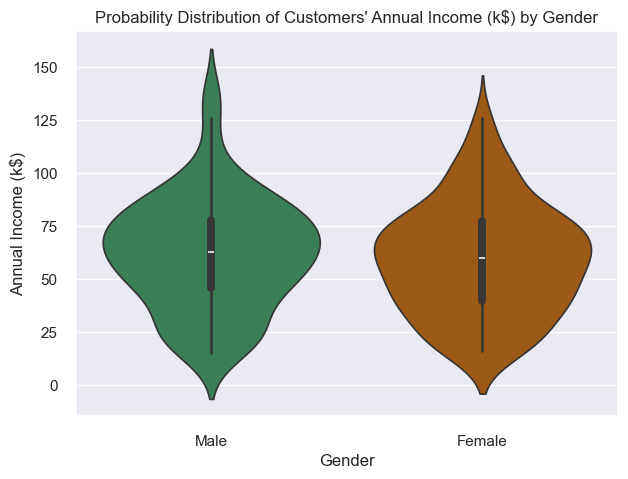

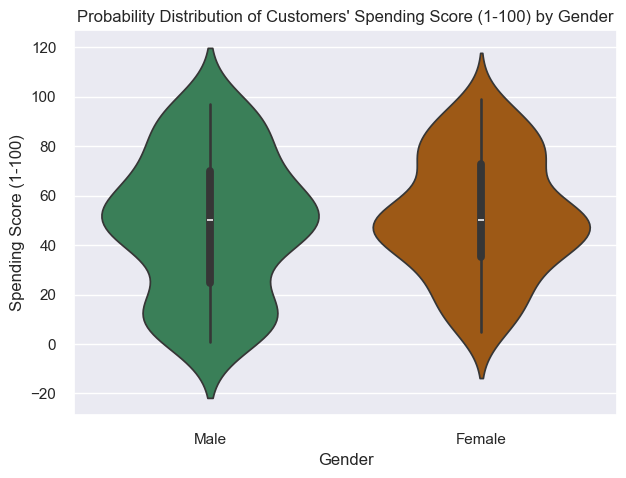

In [9]:
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.set(style='darkgrid')
    plt.figure(figsize=(7, 5))
    sns.violinplot(y=df[col], x=df['Gender'], palette=palette)
    plt.title("Probability Distribution of Customers' {} by Gender".format(col))
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.show()

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

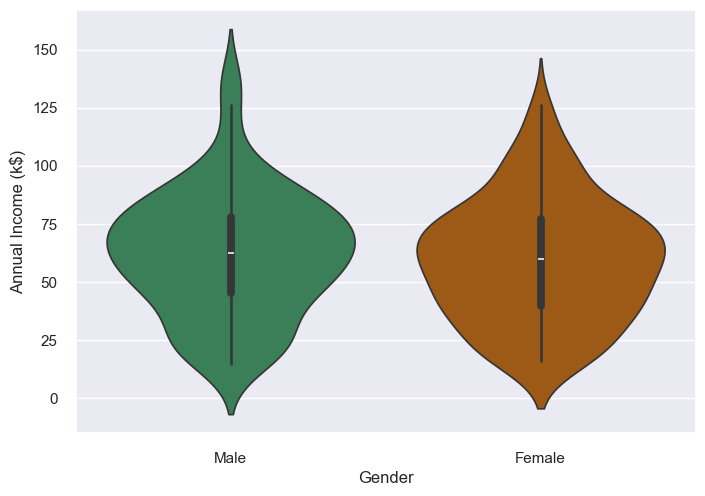

In [10]:
sns.violinplot(y=df['Annual Income (k$)'], x=df['Gender'], palette=palette)

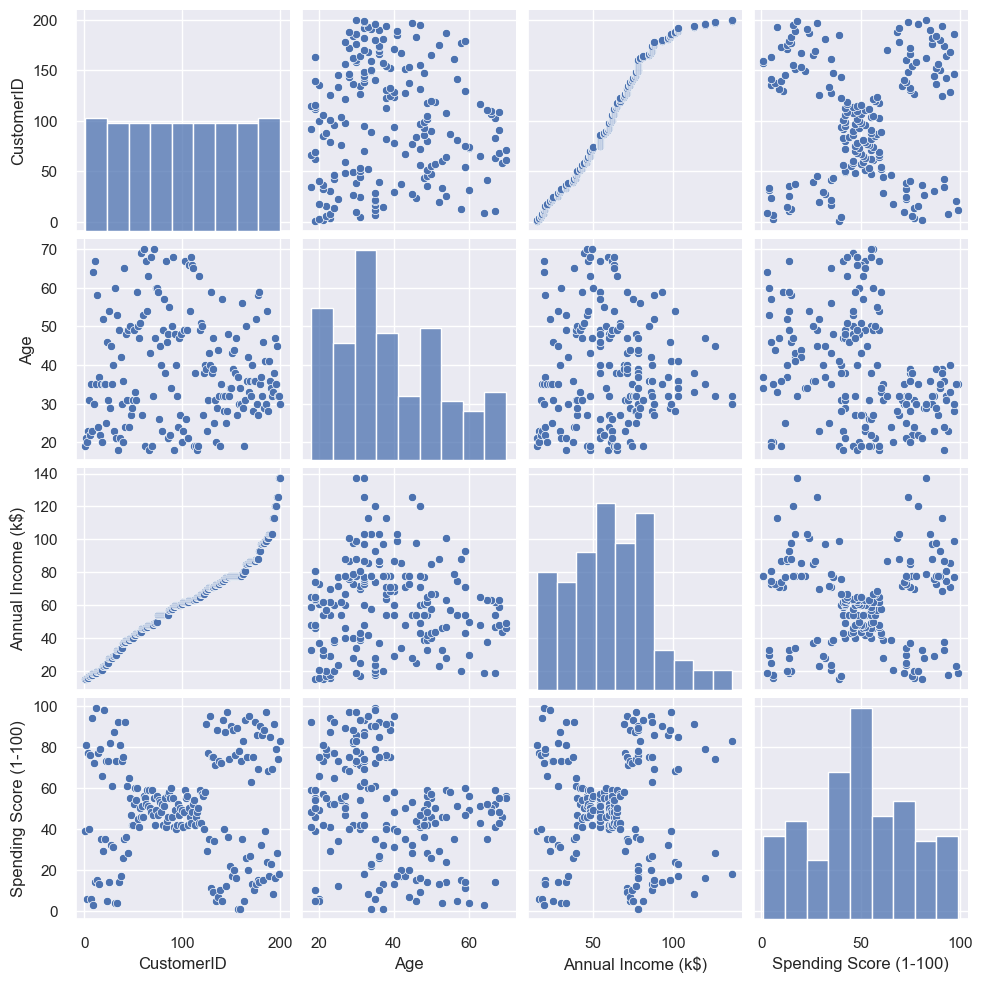

In [11]:
custom_palette = sns.light_palette("seagreen", as_cmap=True)
sns.pairplot(df, palette=custom_palette)

### PyCaret Environment Setup

In [13]:
setup(df, normalize=True, ignore_features='CustomerID', session_id=101)

,Description,Value
0,Session id,101
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,10
4,Numeric features,3
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


### Comparing, Evaluating, and Creating Model

In [14]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [15]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2865,61.1765,1.2711,0,0,0


In [16]:
print(kmeans)

KMeans(n_clusters=4, random_state=101)


In [ ]:
evaluate_model(kmeans)

In [18]:
kmeans_df = assign_model(kmeans)
kmeans_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 0
1,Male,21,15,81,Cluster 0
2,Female,20,16,6,Cluster 2
3,Female,23,16,77,Cluster 2
4,Female,31,17,40,Cluster 2


### Plotting the Model

In [19]:
plot_model(kmeans)

### Saving Model

In [21]:
save_model(kmeans, 'trial_kmeans')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                        

In [24]:
print("Model saved in:", os.getcwd())

Model saved in: c:\Users\Renz\Documents\GitHub
